In [1]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)
import random


2024-07-23 12:00:07.638934: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-23 12:00:08.496560: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-23 12:00:10.349198: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.13.1
2.13.1


In [2]:
#Make sure the GPU is available. 
import tensorflow as tf
device_name = tf.test.gpu_device_name()

2024-07-23 12:10:02.877323: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-23 12:10:02.878883: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-23 12:10:03.149869: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
#Make sure the GPU is available. 
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2024-07-23 12:10:05.250222: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-23 12:10:05.252021: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-23 12:10:05.253398: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
import segmentation_models_3D as sm


Segmentation Models: using `tf.keras` framework.


In [5]:
from skimage import io
from patchify import patchify, unpatchify
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [7]:
num_epochs = 1500


vista_crop_dict = { 0:'NA' , 1: 'ALFALFA', 2: 'BEET', 3: 'CLOVER', 4: 'FLAX', 5: 'FLOWERING_LEGUMES', 6: 'FLOWERS', 7: 'FOREST', 8: 'GRAIN_MAIZE', 9: 'GRASSLAND', 10: 'HOPS', 11: 'LEGUMES', 12: 'NA', 13: 'PERMANENT_PLANTATIONS', 14: 'PLASTIC', 15: 'POTATO', 16: 'PUMPKIN', 17: 'RICE', 18: 'SILAGE_MAIZE', 19: 'SOY', 20: 'SPRING_BARLEY', 21: 'SPRING_OAT', 22: 'SPRING_OTHER_CEREALS', 23: 'SPRING_RAPESEED', 24: 'SPRING_RYE', 25: 'SPRING_SORGHUM', 26: 'SPRING_SPELT', 27: 'SPRING_TRITICALE', 28: 'SPRING_WHEAT', 29: 'SUGARBEET', 30: 'SUNFLOWER', 31: 'SWEET_POTATOES', 32: 'TEMPORARY_GRASSLAND', 33: 'WINTER_BARLEY', 34: 'WINTER_OAT', 35: 'WINTER_OTHER_CEREALS', 36: 'WINTER_RAPESEED', 37: 'WINTER_RYE', 38: 'WINTER_SORGHUM', 39: 'WINTER_SPELT', 40: 'WINTER_TRITICALE', 41: 'WINTER_WHEAT'}

In [8]:
labels = np.load('/home/luser/stelar_3d/storage/full_mast/vista_labes_aligned.npy').astype(np.uint8)

#labels1 = np.load('/home/luser/UniBw-STELAR/dataset/test_saves/vista_labes_image.npy').astype(np.uint8)


In [9]:
unique_elements, element_counts = np.unique(labels, return_counts=True)
unique_elements, element_counts

(array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18,
        19, 20, 21, 23, 27, 28, 30, 32, 33, 34, 35, 36, 37, 40, 41],
       dtype=uint8),
 array([61307860,  1106626,   146323,   143701,     7143,     3025,
          205807,  4566575,  7400638,       72,   924407,   458142,
         8427517,    18792,    60594,     9681,   676780,  1376503,
           31686,     6077,     2623,     2499,     8633,  3142945,
         1564605,   791290,    87956,     1016,  1003306,    16938,
          444574,  6095670]))

In [10]:
# consider ALFALFA
chosen_crop_types = 1
x_inds, y_inds = np.where(labels==chosen_crop_types)
random_corner = random.choices(range(len(x_inds)), k=1)[0]
x_corner = x_inds[random_corner]
y_corner = y_inds[random_corner]

if(x_corner>labels.shape[0]-70):
    x_corner = x_corner-70
if(y_corner>labels.shape[1]-70):
    y_corner = y_corner-70

In [11]:
random.choices(range(len(x_inds)), k=1)[0]

848117

In [12]:
patch_for_the_corner = labels[x_corner:x_corner+64, y_corner:y_corner+64]

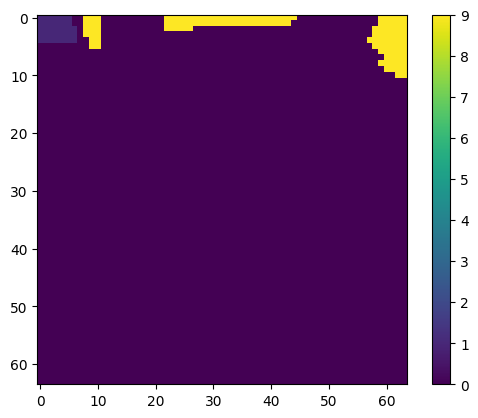

In [13]:
#plt.imshow(labels[x_inds[corner[0]]:x_inds[corner[0]]+64, y_inds[corner[0]]:y_inds[corner[0]]+64])
plt.imshow(patch_for_the_corner)
plt.colorbar()

In [14]:
np.unique(patch_for_the_corner, return_counts=True)

(array([0, 1, 9], dtype=uint8), array([3942,   33,  121]))

In [15]:
patch_for_the_corner[patch_for_the_corner!=1] = 0

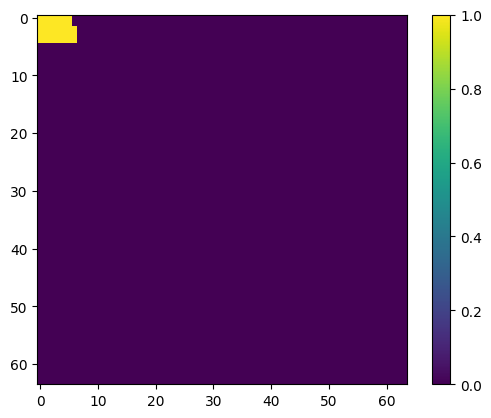

In [16]:
plt.imshow(patch_for_the_corner)
plt.colorbar()

In [17]:
input_img = io.imread('/home/luser/stelar_3d/storage/per_crop_data_labels/ALFALFA/trainALFALFA.tif')
input_mask = io.imread('/home/luser/stelar_3d/storage/per_crop_data_labels/ALFALFA/labALFALFA.tif').astype(np.uint8)

In [18]:
input_img = np.array(input_img).reshape(-1, 64, 64, 64)
input_mask = np.array(input_mask).reshape(-1, 64, 64)
input_mask = np.repeat(input_mask[:, np.newaxis, :, :], repeats=64, axis=1)

print(input_img.shape)
print(input_mask.shape)

(5, 64, 64, 64)
(5, 64, 64, 64)


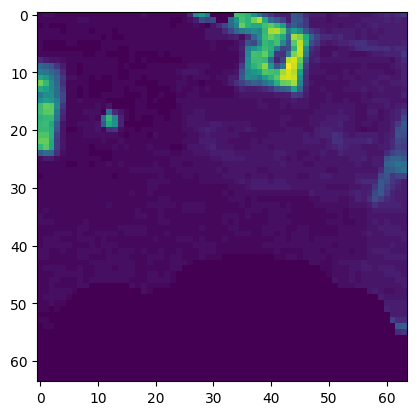

In [119]:
plt.imshow(input_img[1, 32, :, :])

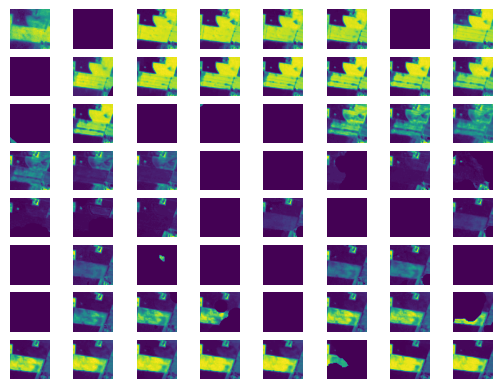

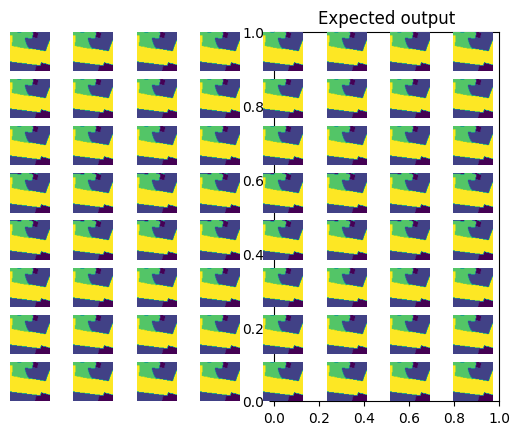

In [120]:
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(input_img[1,i,:,:])
    plt.axis('off')
plt.show()
plt.subplot(1, 2, 2) 
plt.title('Expected output')
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(input_mask[1,i,:,:])
    plt.axis('off')
plt.show()

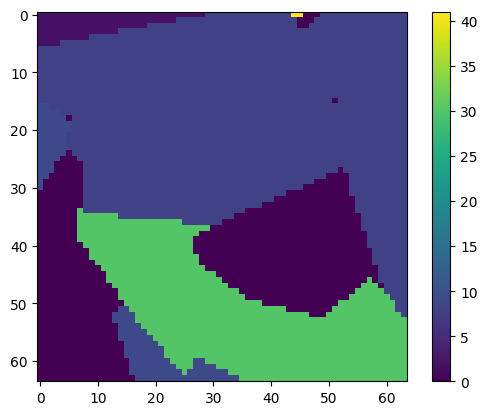

In [121]:
plt.imshow(input_mask[0, 32, :, :])
plt.colorbar()

In [124]:
np.unique(input_mask[1, 20, :, :], return_counts=True)

(array([ 0,  2,  8, 30, 41], dtype=uint8),
 array([ 328,   24, 1371,  718, 1655]))

In [97]:
def get_labels_in_color(groud_truth_image):
    color_map = {
        0: [0, 0, 0],1: [0, 255, 0], 2: [0, 0, 255], 3: [255, 255, 0], 4: [255, 165, 0], 5: [255, 0, 255], 6: [0, 255, 255],   
        7: [128, 0, 128], 8: [128, 128, 0], 9: [0, 128, 0], 10: [128, 0, 0], 11: [0, 0, 128], 12: [128, 128, 128], 13: [0, 128, 128],   
        14: [255, 0, 0], 15: [255, 255, 255], 16: [192, 192, 192], 17: [255, 0, 0], 18: [0, 255, 0], 19: [0, 0, 255], 20: [255, 255, 0],   
        21: [255, 165, 0], 22: [255, 0, 255],  23: [0, 255, 255],  24: [128, 0, 128],  25: [128, 128, 0],  26: [0, 128, 0],     
        27: [128, 0, 0],  28: [0, 0, 128], 29: [128, 128, 128], 30: [0, 128, 128], 31: [0, 0, 0], 32: [255, 255, 255], 
        33: [192, 192, 192], 34: [255, 0, 0], 35: [0, 255, 0], 36: [0, 0, 255], 37: [255, 255, 0], 38: [255, 165, 0], 
        39: [255, 0, 255],  40: [0, 128, 255] }
    groud_truth_color_image = np.zeros(groud_truth_image.shape + (3,), dtype=np.uint8)
    for i in range(groud_truth_image.shape[0]):
        for j in range(groud_truth_image.shape[1]):
            segment_id_gt = groud_truth_image[i, j]
            groud_truth_color_image[i, j] = color_map[segment_id_gt]
    return groud_truth_color_image

In [98]:
# 3 good, 4 bit variety, 7 good
select_patch = 1
selected_patch = input_mask[select_patch,:,:]
labels_color = get_labels_in_color(selected_patch)
plt.figure(figsize=(6,6))
plt.title('Time series input')
plt.axis('off')
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(input_img[select_patch,i,:,:])
    plt.axis('off')
plt.show()
plt.subplot(1, 2, 2) 
plt.title('Expected output')
plt.axis('off')
plt.imshow(labels_color)
plt.axis('off')
plt.show()



TypeError: unhashable type: 'numpy.ndarray'

In [53]:
unique_x_quotient_inds = (unique_x_inds)//64

print(unique_x_quotient_inds)

unique_unique_x_quotient_inds = np.unique(unique_x_quotient_inds)


unique_y_quotient_inds = (unique_y_inds)//64

print(unique_y_quotient_inds)

unique_unique_y_quotient_inds = np.unique(unique_y_quotient_inds)

[  5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5
   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5
   5   5   5   5   7   7   7   7   7   7   7   7   7   7   7   7   7   7
   7   7   7   7  49  49  49  49  49  49  49  49  49  49  49  49  49  49
  49  49  49  49  49  50  50  50  70  70  70  70  70  70  70  70  70  70
  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70  70
  70  70  70  70  70  70  70  70  70  70  71  71  71  71  71  71  71  71
  71  71  71  71  71  71  71  71  71  71  71  71  71  99  99  99  99  99
  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99
  99  99  99  99  99  99  99 100 100 100 142 142 142 142 142 142 142 142
 142 142 142 142 142 142 142 142 142 142 142 142 142]
[ 42  42  42  42  42  42  42  42  42  42  42  42  42  43  43  59  59  59
  59  59  59  59  59  59  59  79  79  79  79  79  79  79  79  79  79  80
  80  80  80  80  80  80  80  80  80  80  80  80  80  80  80  80  80  

In [54]:
unique_unique_x_quotient_inds, unique_unique_y_quotient_inds

(array([  5,   7,  49,  50,  70,  71,  99, 100, 142]),
 array([ 42,  43,  59,  79,  80,  81,  82, 146, 147, 154]))

In [55]:
#box origins

unique_unique_x_quotient_inds * 64 , unique_unique_y_quotient_inds * 64

box_x_origins = unique_unique_x_quotient_inds * 64
box_y_origins = unique_unique_y_quotient_inds * 64


box_x_origins, box_y_origins

(array([ 320,  448, 3136, 3200, 4480, 4544, 6336, 6400, 9088]),
 array([2688, 2752, 3776, 5056, 5120, 5184, 5248, 9344, 9408, 9856]))

In [60]:
#box ends

#unique_unique_x_quotient_inds * 64 + 64, unique_unique_y_quotient_inds * 64 + 64


box_x_ends = unique_unique_x_quotient_inds * 64 + 64
box_y_ends = unique_unique_y_quotient_inds * 64 + 64

box_x_ends, box_y_ends

(array([ 384,  512, 3200, 3264, 4544, 4608, 6400, 6464, 9152]),
 array([2752, 2816, 3840, 5120, 5184, 5248, 5312, 9408, 9472, 9920]))

In [66]:
test_patch = labels[box_x_origins[0]:box_x_ends[0], box_y_origins[2]:box_y_ends[2]]

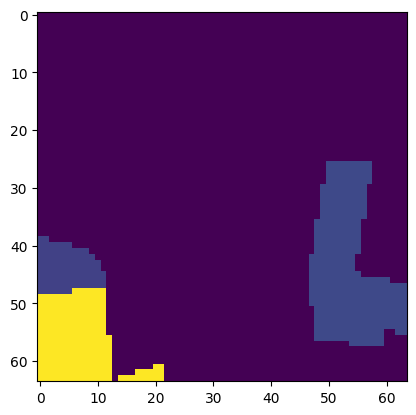

In [67]:
plt.imshow(test_patch)

In [68]:
np.unique(test_patch)

array([ 0,  8,  9, 41], dtype=uint8)

In [15]:
for a in unique_unique_x_quotient_inds:
    print(a)

5
7
49
50
70
71
99
100
142


In [38]:
unique_x_inds%64

array([ 6,  7,  8, ...,  9, 10, 11])

In [44]:
((unique_x_inds//64)* 64)+ (unique_x_inds%64)

array([   6,    7,    8, ..., 9993, 9994, 9995])

In [31]:
x_inds[x_inds<6+64], y_inds[x_inds<6+64]

(array([ 6,  6,  7, ..., 69, 69, 69]),
 array([8042, 8043, 8040, ..., 6525, 6526, 6527]))

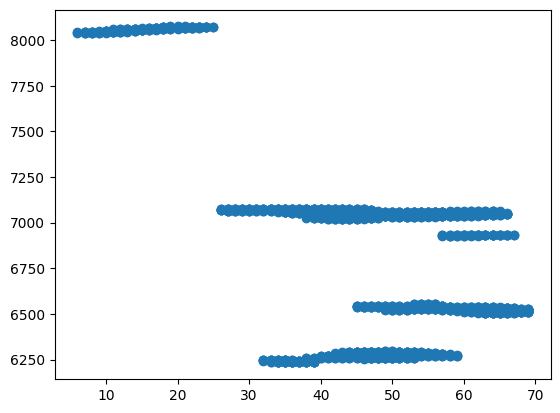

In [32]:
plt.scatter(x_inds[x_inds<6+64], y_inds[x_inds<6+64])

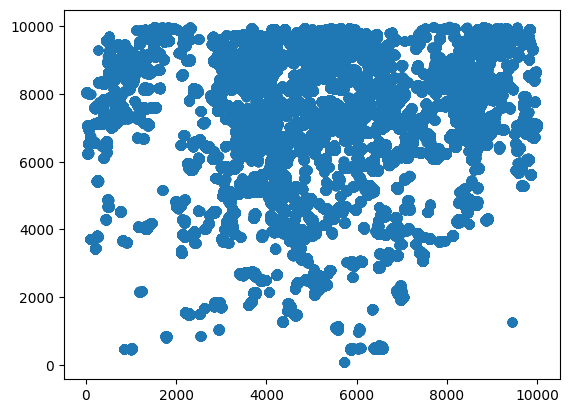

In [19]:
plt.scatter(x_inds, y_inds)

In [10]:
sorted_indices = np.argsort(-element_counts)


In [11]:

# Arrange unique elements and their counts in descending order
unique_elements_sorted = unique_elements[sorted_indices]
element_counts_sorted = element_counts[sorted_indices]

In [13]:
element_counts_sorted, unique_elements_sorted

(array([61307860,  8427517,  7400638,  6095670,  4566575,  3142945,
         1564605,  1376503,  1106626,  1003306,   924407,   791290,
          676780,   458142,   444574,   205807,   146323,   143701,
           87956,    60594,    31686,    18792,    16938,     9681,
            8633,     7143,     6077,     3025,     2623,     2499,
            1016,       72]),
 array([ 0, 13,  9, 41,  8, 30, 32, 19,  1, 36, 11, 33, 18, 12, 40,  7,  2,
         3, 34, 15, 20, 14, 37, 16, 28,  4, 21,  5, 23, 27, 35, 10],
       dtype=uint8))